In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot

In [2]:
df = pd.read_csv("D:\Study\BA\TEST\BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df = df.iloc[:, :-2]

In [5]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

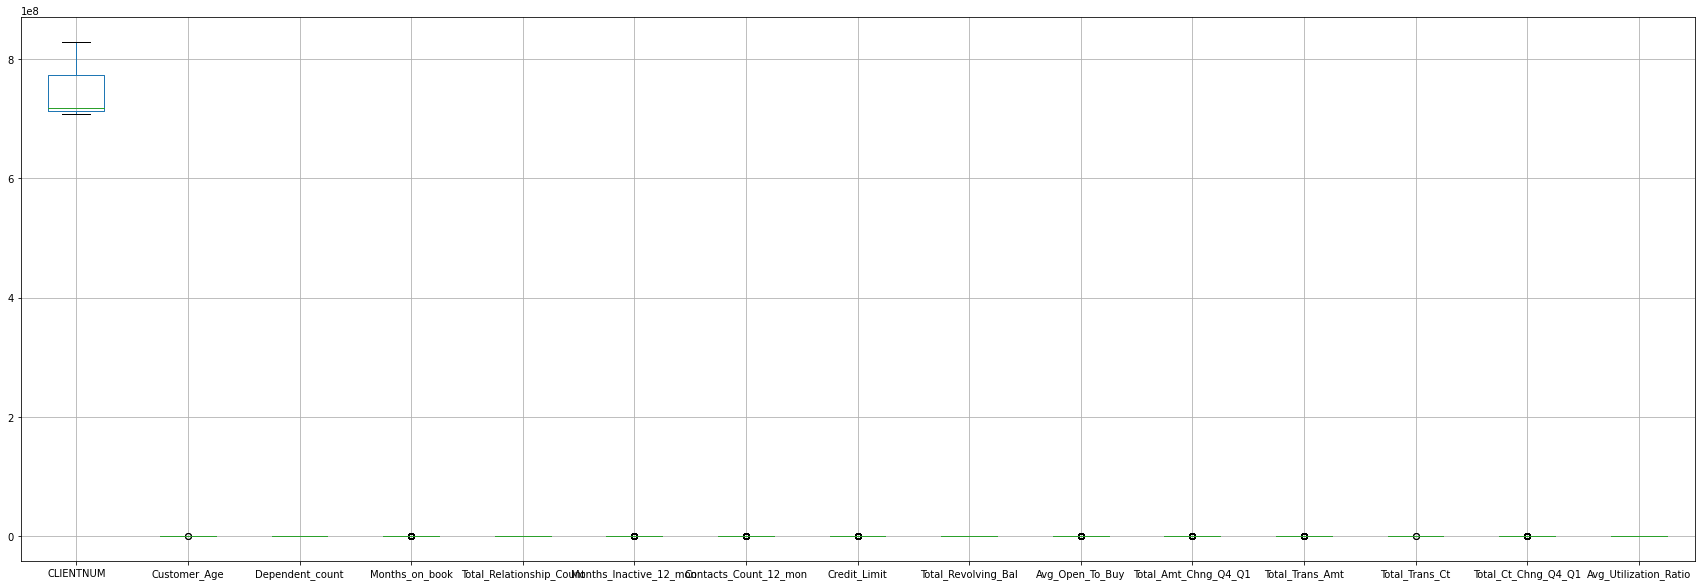

In [8]:
df.boxplot(figsize=(30,10))

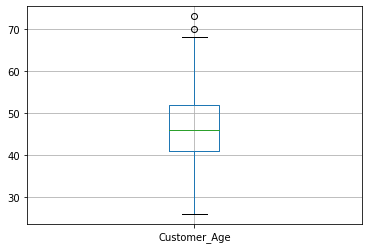

In [9]:
df.boxplot('Customer_Age')

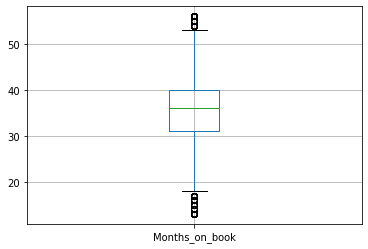

In [10]:
min=df['Customer_Age'].quantile(0.05)
max=df['Customer_Age'].quantile(0.95)
new=np.where(df['Customer_Age']<min,min,df['Customer_Age'])
df['Customer_Age']=new
new=np.where(df['Customer_Age']>max,max,df['Customer_Age'])
df['Customer_Age']=new
df.boxplot('Months_on_book')

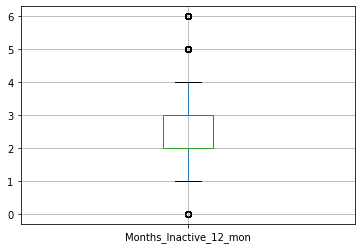

In [11]:
min=df['Months_on_book'].quantile(0.05)
max=df['Months_on_book'].quantile(0.95)
new=np.where(df['Months_on_book']<min,min,df['Months_on_book'])
df['Months_on_book']=new
new=np.where(df['Months_on_book']>max,max,df['Months_on_book'])
df['Months_on_book']=new
df.boxplot('Months_Inactive_12_mon')

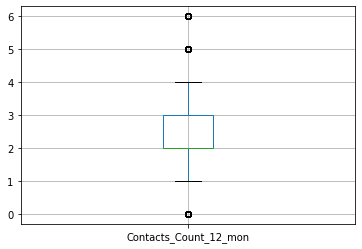

In [12]:
min=df['Months_Inactive_12_mon'].quantile(0.05)
max=df['Months_Inactive_12_mon'].quantile(0.95)
new=np.where(df['Months_Inactive_12_mon']<min,min,df['Months_Inactive_12_mon'])
df['Months_Inactive_12_mon']=new
new=np.where(df['Months_Inactive_12_mon']>max,max,df['Months_Inactive_12_mon'])
df['Months_Inactive_12_mon']=new
df.boxplot('Contacts_Count_12_mon')

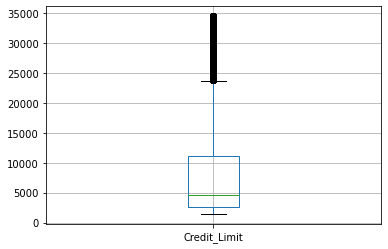

In [13]:
min=df['Contacts_Count_12_mon'].quantile(0.05)
max=df['Contacts_Count_12_mon'].quantile(0.95)
new=np.where(df['Contacts_Count_12_mon']<min,min,df['Contacts_Count_12_mon'])
df['Contacts_Count_12_mon']=new
new=np.where(df['Contacts_Count_12_mon']>max,max,df['Contacts_Count_12_mon'])
df['Contacts_Count_12_mon']=new
df.boxplot('Credit_Limit')

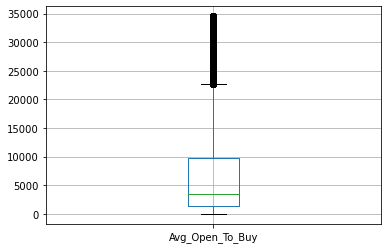

In [14]:
min=df['Credit_Limit'].quantile(0.05)
max=df['Credit_Limit'].quantile(0.90)
new=np.where(df['Credit_Limit']<min,min,df['Credit_Limit'])
df['Credit_Limit']=new
new=np.where(df['Credit_Limit']>max,max,df['Credit_Limit'])
df['Credit_Limit']=new
df.boxplot('Avg_Open_To_Buy')

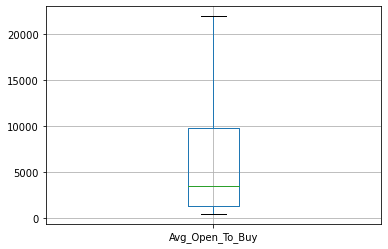

In [15]:
min=df['Avg_Open_To_Buy'].quantile(0.05)
max=df['Avg_Open_To_Buy'].quantile(0.90)
new=np.where(df['Avg_Open_To_Buy']<min,min,df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy']=new
new=np.where(df['Avg_Open_To_Buy']>max,max,df['Avg_Open_To_Buy'])
df['Avg_Open_To_Buy']=new
df.boxplot('Avg_Open_To_Buy')

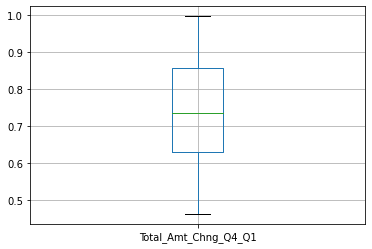

In [16]:
min=df['Total_Amt_Chng_Q4_Q1'].quantile(0.05)
max=df['Total_Amt_Chng_Q4_Q1'].quantile(0.90)
new=np.where(df['Total_Amt_Chng_Q4_Q1']<min,min,df['Total_Amt_Chng_Q4_Q1'])
df['Total_Amt_Chng_Q4_Q1']=new
new=np.where(df['Total_Amt_Chng_Q4_Q1']>max,max,df['Total_Amt_Chng_Q4_Q1'])
df['Total_Amt_Chng_Q4_Q1']=new
df.boxplot('Total_Amt_Chng_Q4_Q1')

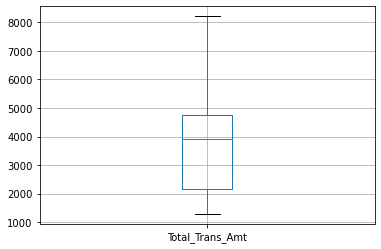

In [17]:
min=df['Total_Trans_Amt'].quantile(0.05)
max=df['Total_Trans_Amt'].quantile(0.90)
new=np.where(df['Total_Trans_Amt']<min,min,df['Total_Trans_Amt'])
df['Total_Trans_Amt']=new
new=np.where(df['Total_Trans_Amt']>max,max,df['Total_Trans_Amt'])
df['Total_Trans_Amt']=new
df.boxplot('Total_Trans_Amt')

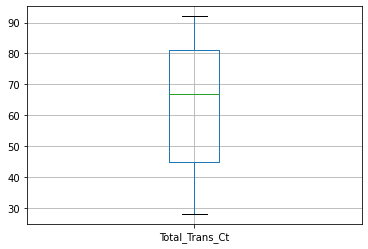

In [18]:
min=df['Total_Trans_Ct'].quantile(0.05)
max=df['Total_Trans_Ct'].quantile(0.90)
new=np.where(df['Total_Trans_Ct']<min,min,df['Total_Trans_Ct'])
df['Total_Trans_Ct']=new
new=np.where(df['Total_Trans_Ct']>max,max,df['Total_Trans_Ct'])
df['Total_Trans_Ct']=new
df.boxplot('Total_Trans_Ct')

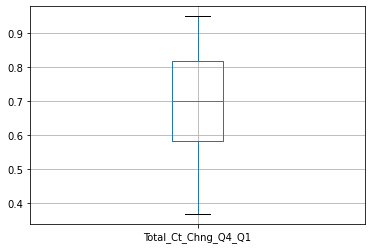

In [19]:
min=df['Total_Ct_Chng_Q4_Q1'].quantile(0.05)
max=df['Total_Ct_Chng_Q4_Q1'].quantile(0.90)
new=np.where(df['Total_Ct_Chng_Q4_Q1']<min,min,df['Total_Ct_Chng_Q4_Q1'])
df['Total_Ct_Chng_Q4_Q1']=new
new=np.where(df['Total_Ct_Chng_Q4_Q1']>max,max,df['Total_Ct_Chng_Q4_Q1'])
df['Total_Ct_Chng_Q4_Q1']=new
df.boxplot('Total_Ct_Chng_Q4_Q1')

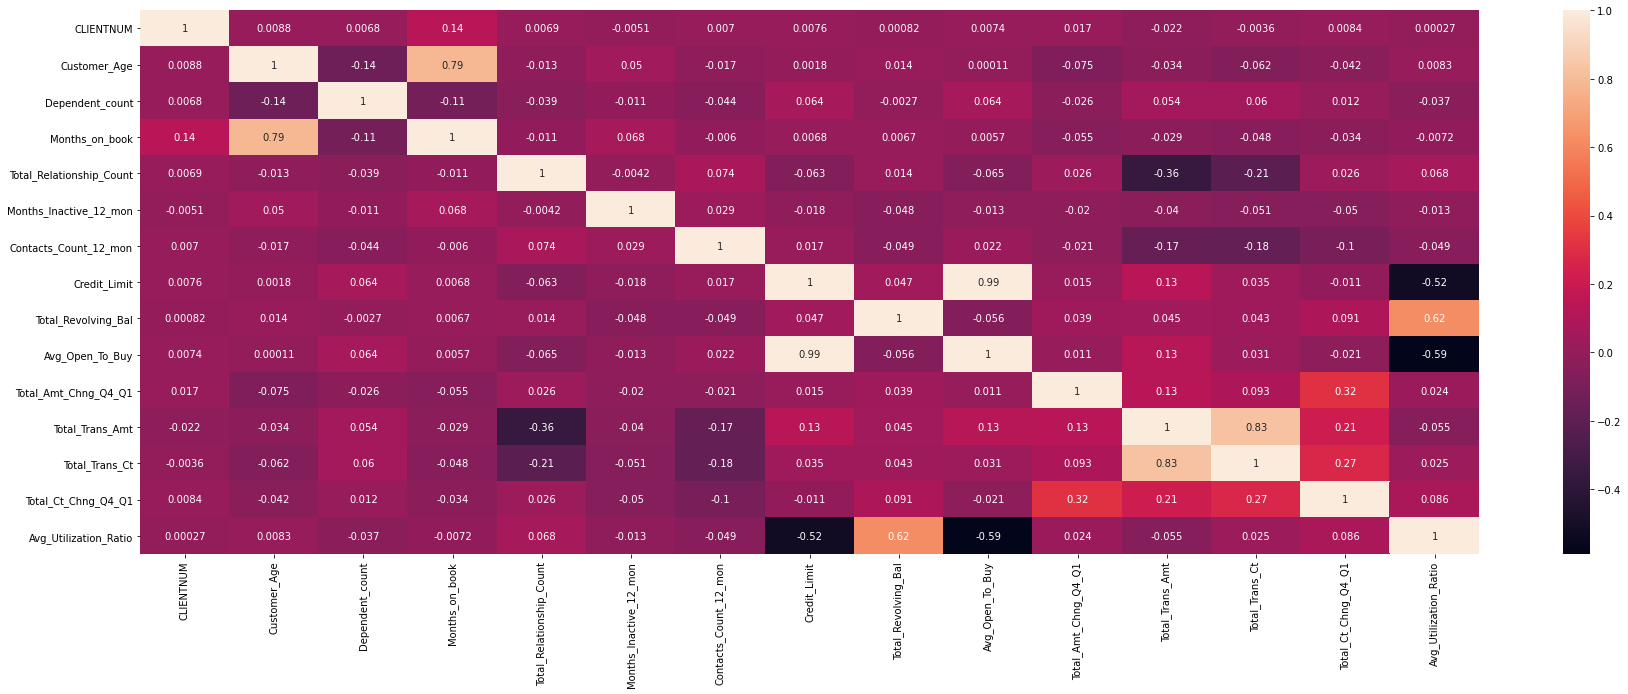

In [20]:
corr = df.corr()
plt.subplots(figsize = (30,10))
sns.heatmap(corr,annot=True)

In [21]:
df = df.drop('CLIENTNUM',axis=1)

In [22]:
df.Attrition_Flag=pd.Series(np.where(df.Attrition_Flag=='Existing Customer',1,0),
           df.index)

In [23]:
#VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
DFn = df.select_dtypes(numerics)

In [27]:
x = DFn.drop(['Attrition_Flag','Credit_Limit','Customer_Age','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Months_on_book','Total_Ct_Chng_Q4_Q1'],axis=1)

In [28]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
print(vif_data)

                    feature       VIF
0           Dependent_count  3.907784
1  Total_Relationship_Count  5.774798
2    Months_Inactive_12_mon  6.172536
3     Contacts_Count_12_mon  6.029674
4       Total_Revolving_Bal  6.599755
5           Avg_Open_To_Buy  3.705528
6           Total_Trans_Amt  4.014754
7     Avg_Utilization_Ratio  6.396369


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  float64
 11  Contacts_Count_12_mon     10127 non-null  float64
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Card_Category'] = le.fit_transform(df['Card_Category'])

In [32]:
y = df['Attrition_Flag']
x = df.drop(['Attrition_Flag','Customer_Age','Card_Category','Education_Level','Income_Category','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio'],axis=1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(y,x, test_size=0.30)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7088,), (3039,), (7088, 12), (3039, 12))

In [35]:
import statsmodels.api as sm
lm = sm.OLS(x_train,y_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Attrition_Flag   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              5238.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:29:31   Log-Likelihood:                         -1297.9
No. Observations:                7088   AIC:                                      2620.
Df Residuals:                    7076   BIC:                                      2702.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Gender                       0.0571      0.008      7.337      0.000       0.042       0.072
Dependent_count             -0.0122      0.003     -4.715      0.000      -0.017      -0.007
Marital_Status              -0.0203      0.005     -4.408      0.000      -0.029      -0.011
Months_on_book               0.0010      0.000      2.595      0.009       0.000       0.002
Total_Relationship_Count     0.0363      0.002     15.645      0.000       0.032       0.041
Months_Inactive_12_mon      -0.0560      0.004    -14.975      0.000      -0.063      -0.049
Contacts_Count_12_mon       -0.0444      0.003    -13.032      0.000      -0.051      -0.038
Credit_Limit               1.66e-06   5.56e-07      2.988      0.003    5.71e-07    2.75e-06
Total_Revolving_Bal          0.0001   4.24e-06     23.859      0.000    9.28e-05       0.000
Total_Trans_Amt          -7.039e-05   3.19e-06    -22.057      0.000   -7.66e-05   -6.41e-05
Total_Trans_Ct               0.0122      0.000     39.809      0.000       0.012       0.013
Total_Ct_Chng_Q4_Q1          0.4346      0.020     21.423      0.000       0.395       0.474
==============================================================================
Omnibus:                      699.696   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.785
Skew:                          -0.838   Prob(JB):                    9.30e-202
Kurtosis:                       3.571   Cond. No.                     6.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
final = lm.predict(y_test)
prediction = list(map(round,final))

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(x_test, prediction)
cm

array([[ 229,  225],
       [  44, 2541]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy = accuracy_score(x_test, prediction)

In [40]:
accuracy

0.9114840408028957